In [1]:
import numpy as np
import cv2

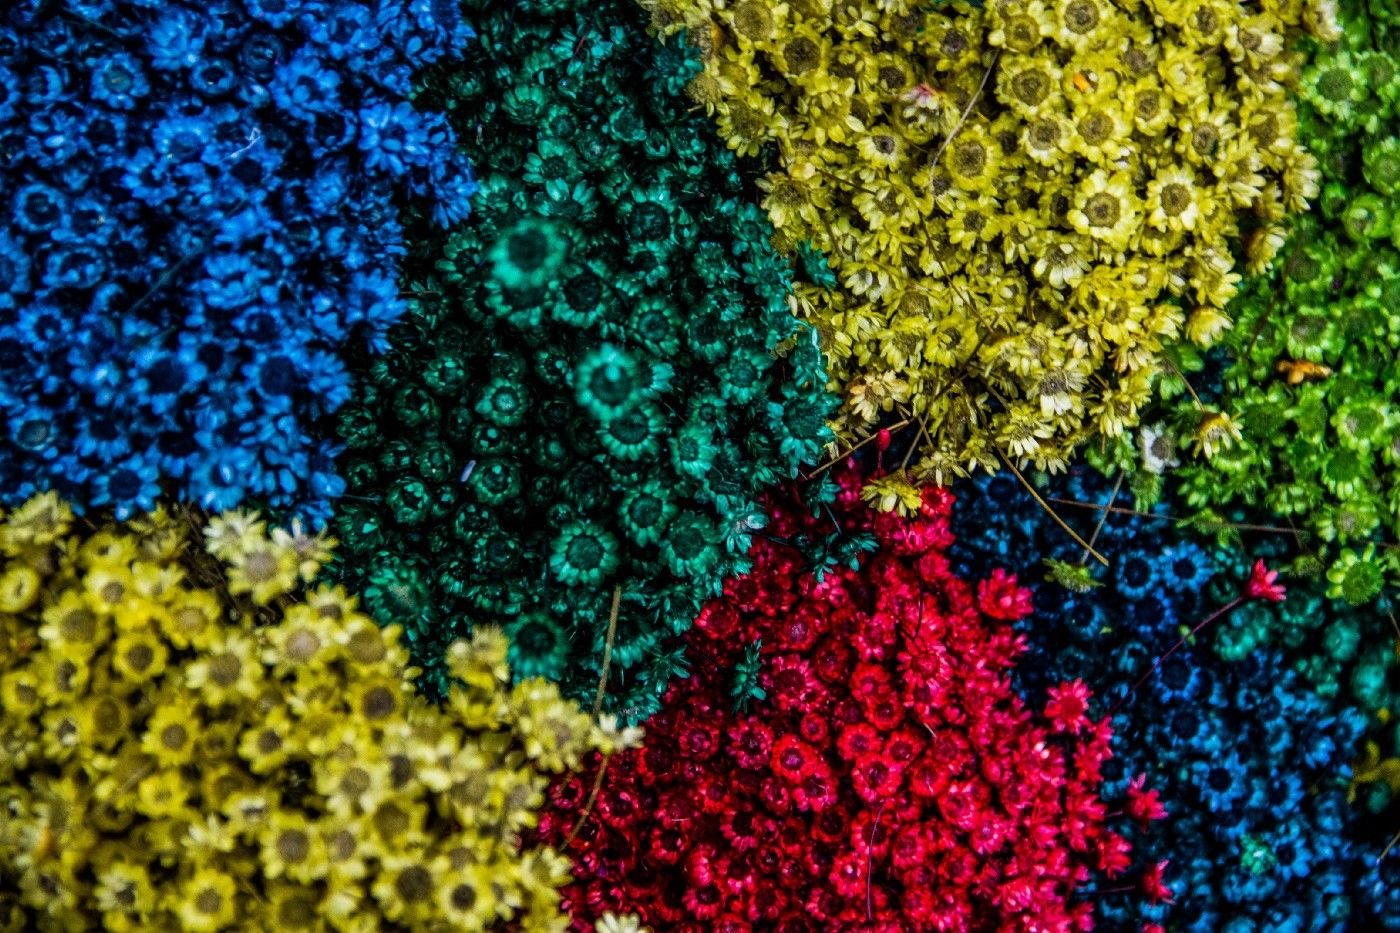

In [2]:
img=cv2.imread('flowers.jpeg')
cv2.imshow('flowers',img)


In [3]:
np.shape(img)

(933, 1400, 3)

In [4]:
data = np.reshape(img ,(height*width,3))
data= np.float32(data)

array([[14.  7.  4.][12.  6.  1.][14.  3.  0.] ... [10.  1.  0.][ 9.  0.  0.][ 7.  0.  0.]])}

In [5]:
if(width>height):
number_clusters=10
else :
number_clusters=6

In [6]:
criteria=(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER,10 ,1.0)
flags =cv2.KMEANS_RANDOM_CENTERS
compactness, lebels, centers = cv2.kmeans(data,number_clusters, None , criteria , 50 , flags)

In [7]:
fy = [], ff=0
for x in range(number_clusters):
lower = np.array([centers[x][0] - 5, centers[x][1] - 5, centers[x][2] - 5])
upper = np.array([centers[x][0] + 5, centers[x][1] + 5, centers[x][2] + 5])
first_px = np.where(cv2.inRange(img, lower, upper))
fy.append(len(first_px[0])), ff = ff+len(first_px[0])

In [8]:
p=[]
for x in range(number_clusters):p.append(float(fy[x]/ff))

array([0.08596105271734703, 0.12116027051250713, 0.0196366006681333, 0.04856188380998941, 0.372036176973845, 0.06290230587468426, 0.06974659822374317, 0.16377413835248106, 0.038621363969689564, 0.017599608897580055])

In [9]:
def create_bar(height, width, color):
bar = np.zeros((height, width, 3), np.uint8)
bar[:] = color
red, green, blue =int(color[2]), int(color[1]), int(color[0])
return bar, (red, green,blue)

In [10]:
bars = []
RGB_values = []
for index, row in enumerate(centers):
bar, rgb = create_bar(200, 200, row)
bars.append(bar)
RGB_values.append(rgb)

In [11]:
for x in range(number_clusters):
for xx in range(number_clusters):
if(fy[x]<fy[xx]):
t=p[x]
p[x]=p[xx]
p[xx]=t
temp=fy[x]
fy[x]=fy[xx]
fy[xx]=temp
bar=bars[x]
bars[x]=bars[xx]
bars[xx]=bar

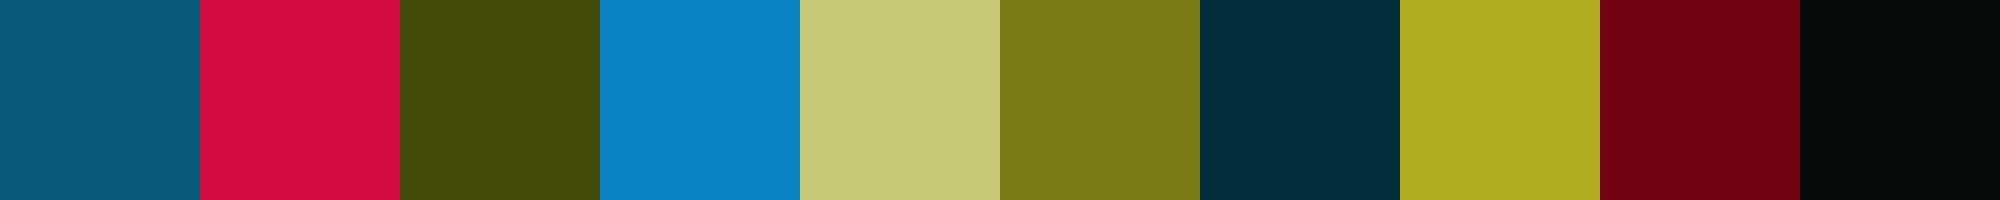

In [12]:
img_bar=np.hstack(bars)

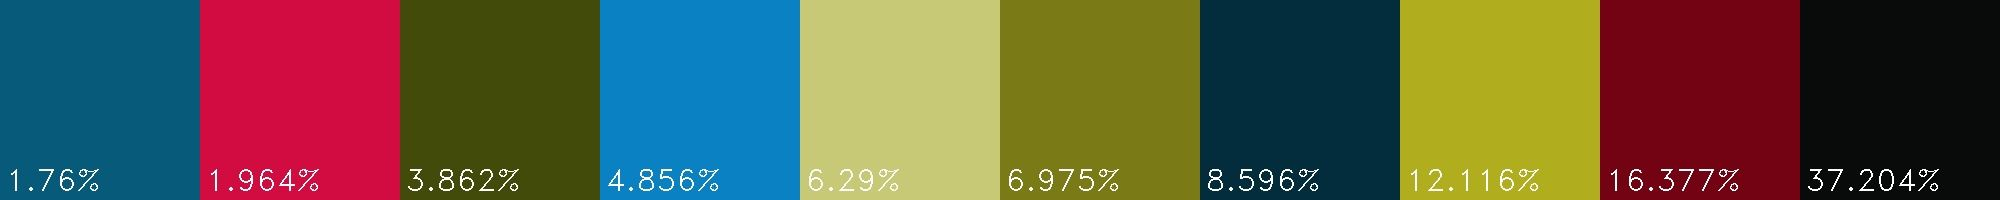

In [13]:
for k in range(number_clusters):
cv2.putText(bars[k],str(round(p[k]*100,3))+%,( 5, 200-10),2,1,(255,255,255) )
img_bar=np.hstack(bars)

In [14]:
if(width>height):
img_bar = np.hstack(bars)
img_bar=cv2.resize(img_bar,(width,int(height/5)))
im=cv2.vconcat([img,img_bar])
else:
img_bar = np.vstack(bars)
img_bar = cv2.resize(img_bar, (int(width/5), height))
im = cv2.hconcat([img_bar, img])

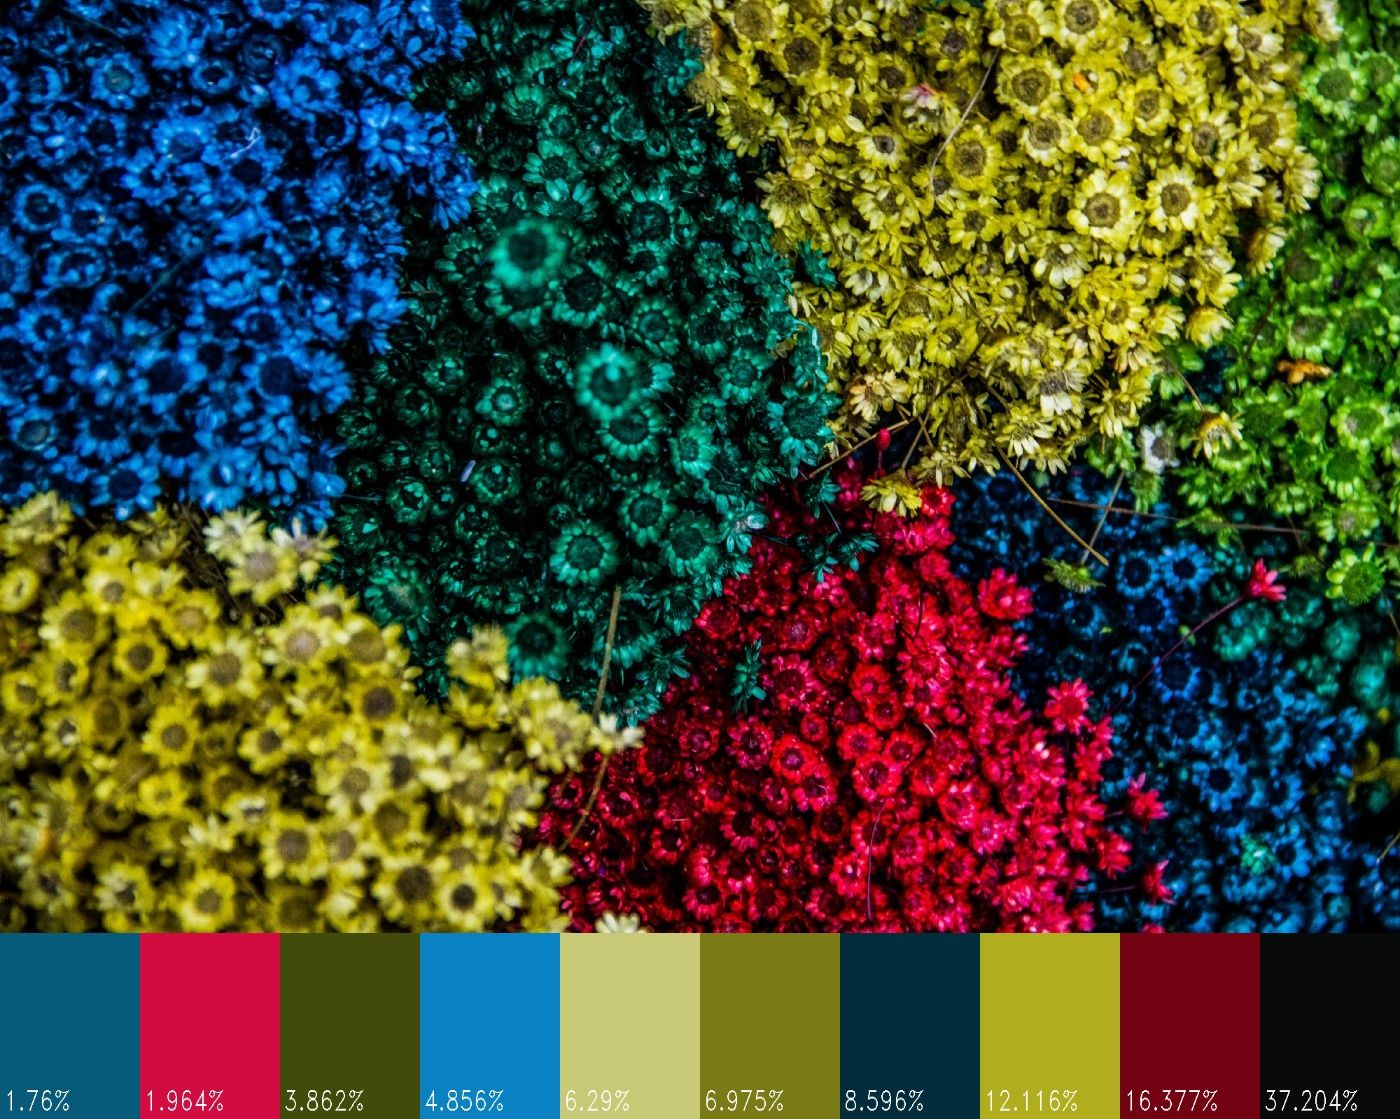

In [15]:
cv2.imshow('flower',im)

In [16]:
hex_colors= []
for k in range(number_clusters): 
hex_colors.append('#%02X%02X%02X' % (RGB_values[k][0],RGB_values[k][1],RGB_values[k][2]))

#032D3C, #B0AD1F, #D20C41, #0981C3, #090B0B, #C8C976, #7A7B16, #730312, #434B0A, #075A7A

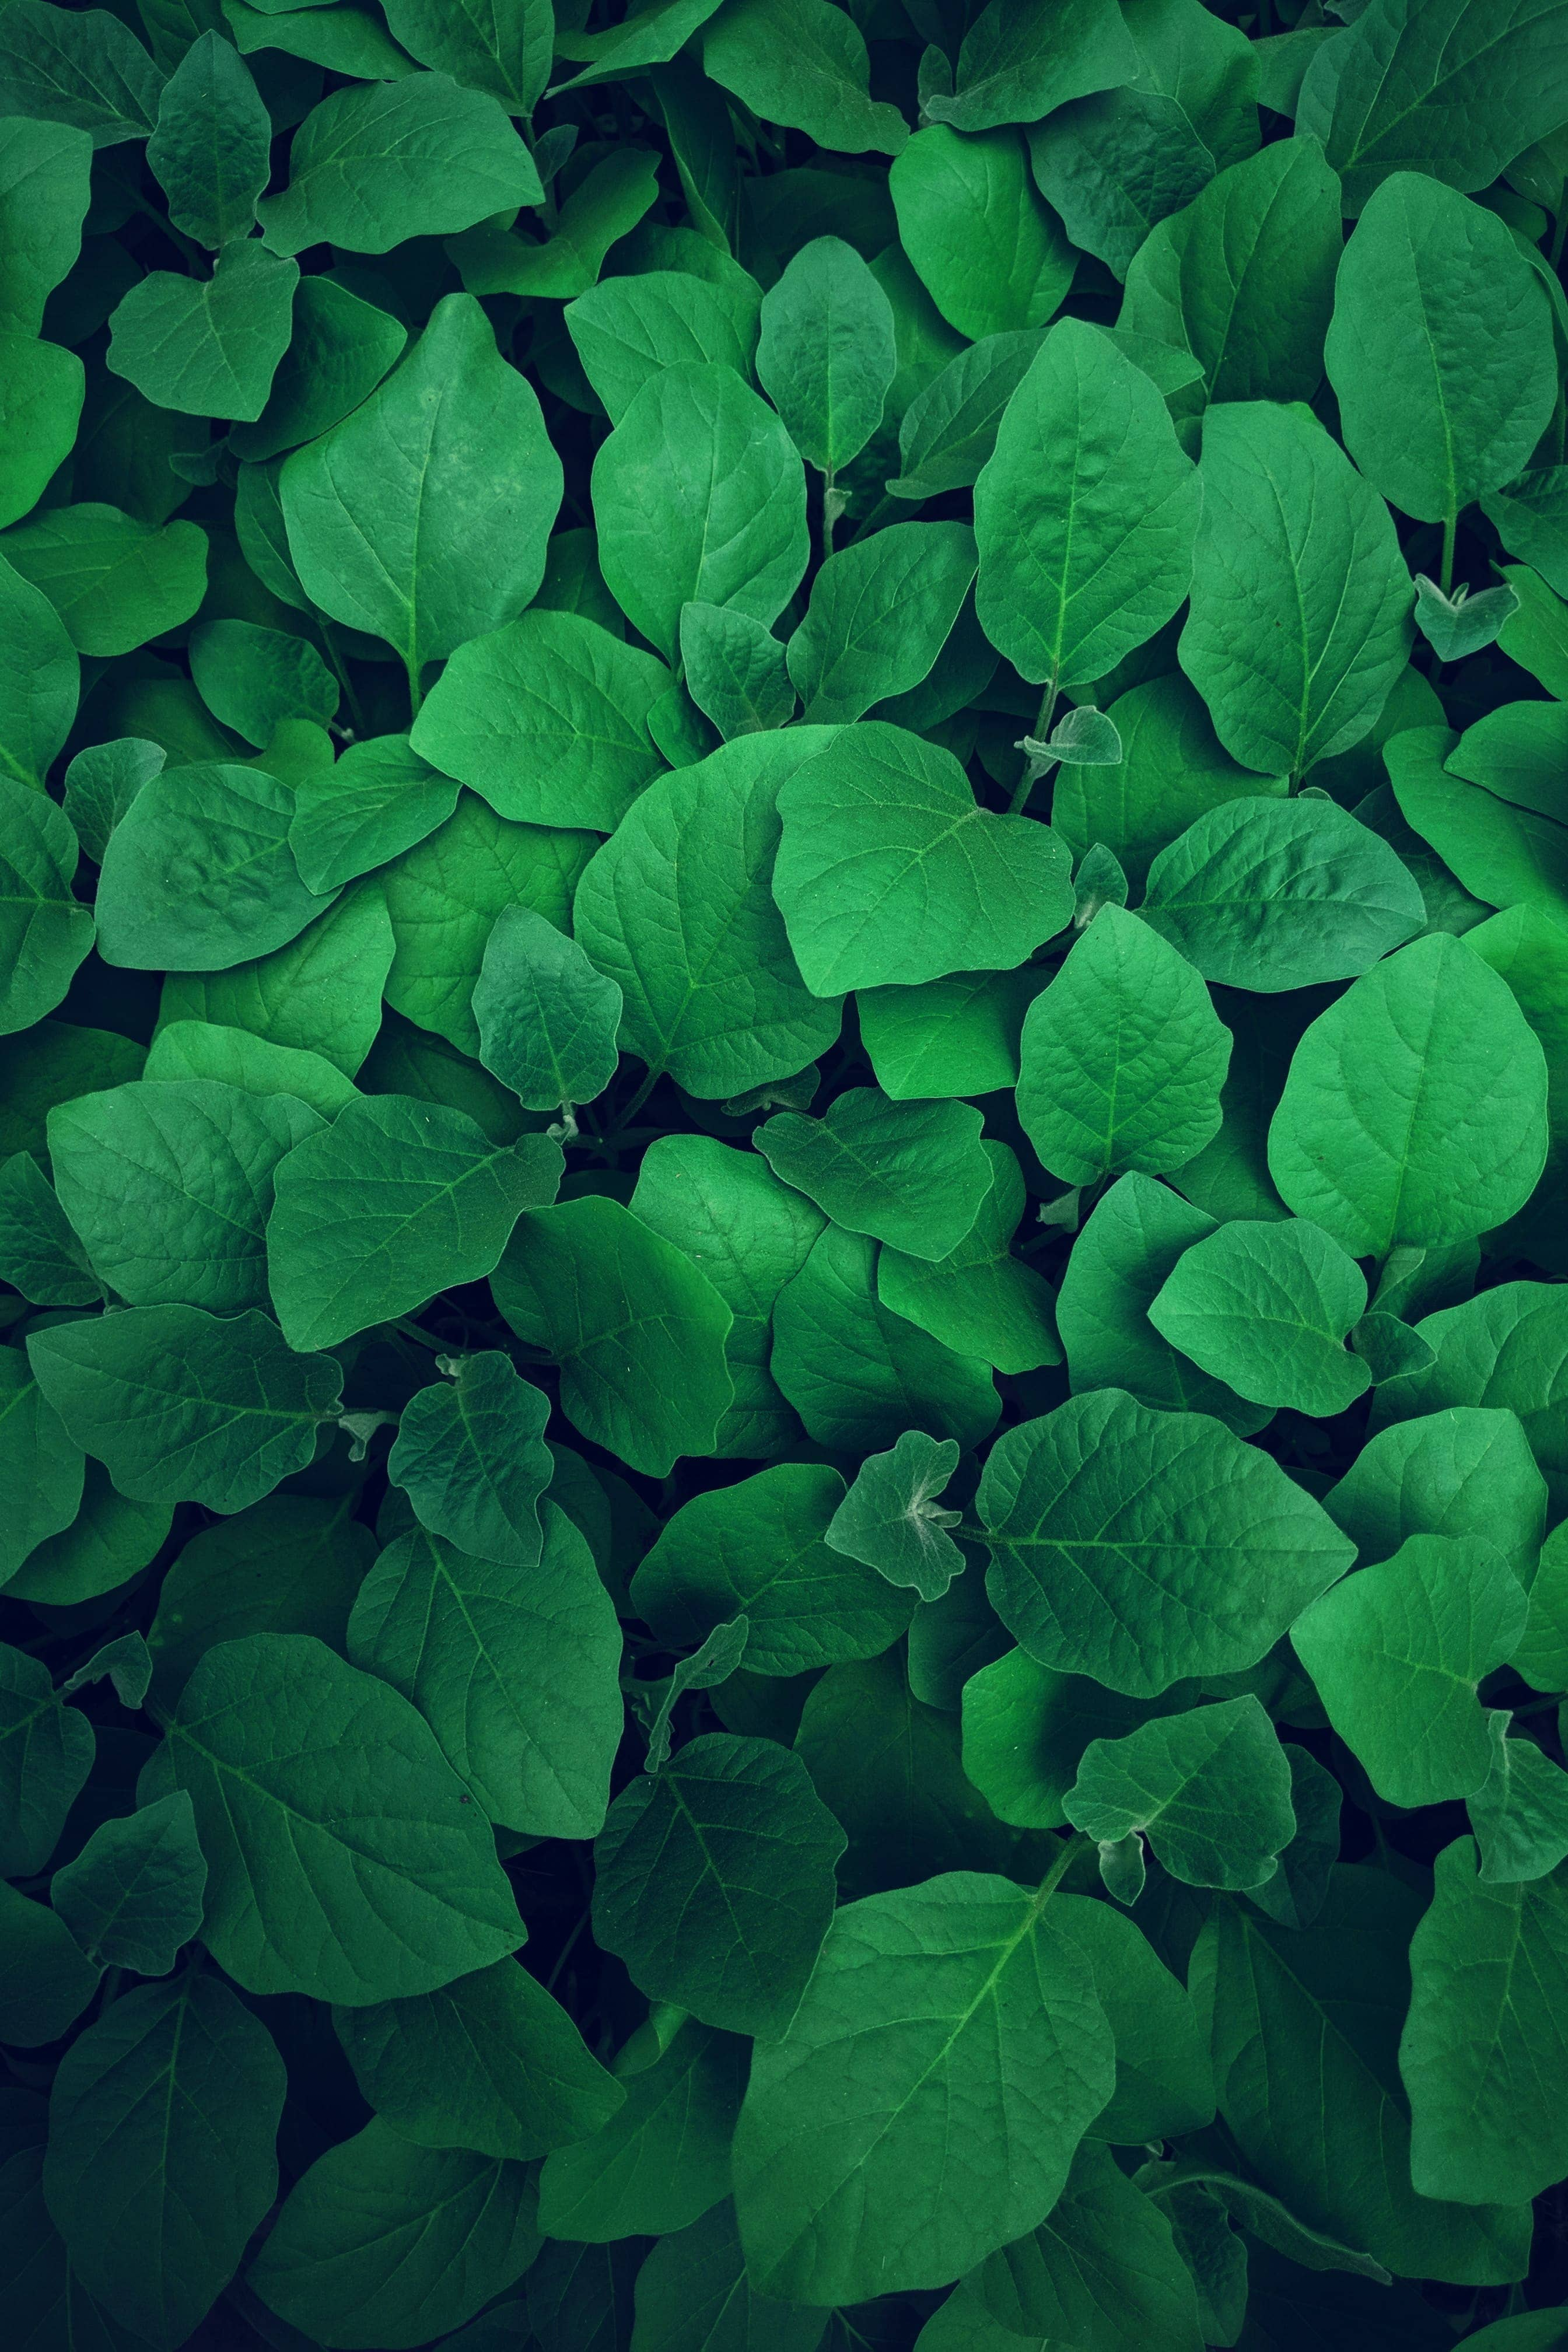

In [17]:
#if height > width
it will be concatenated horizontally

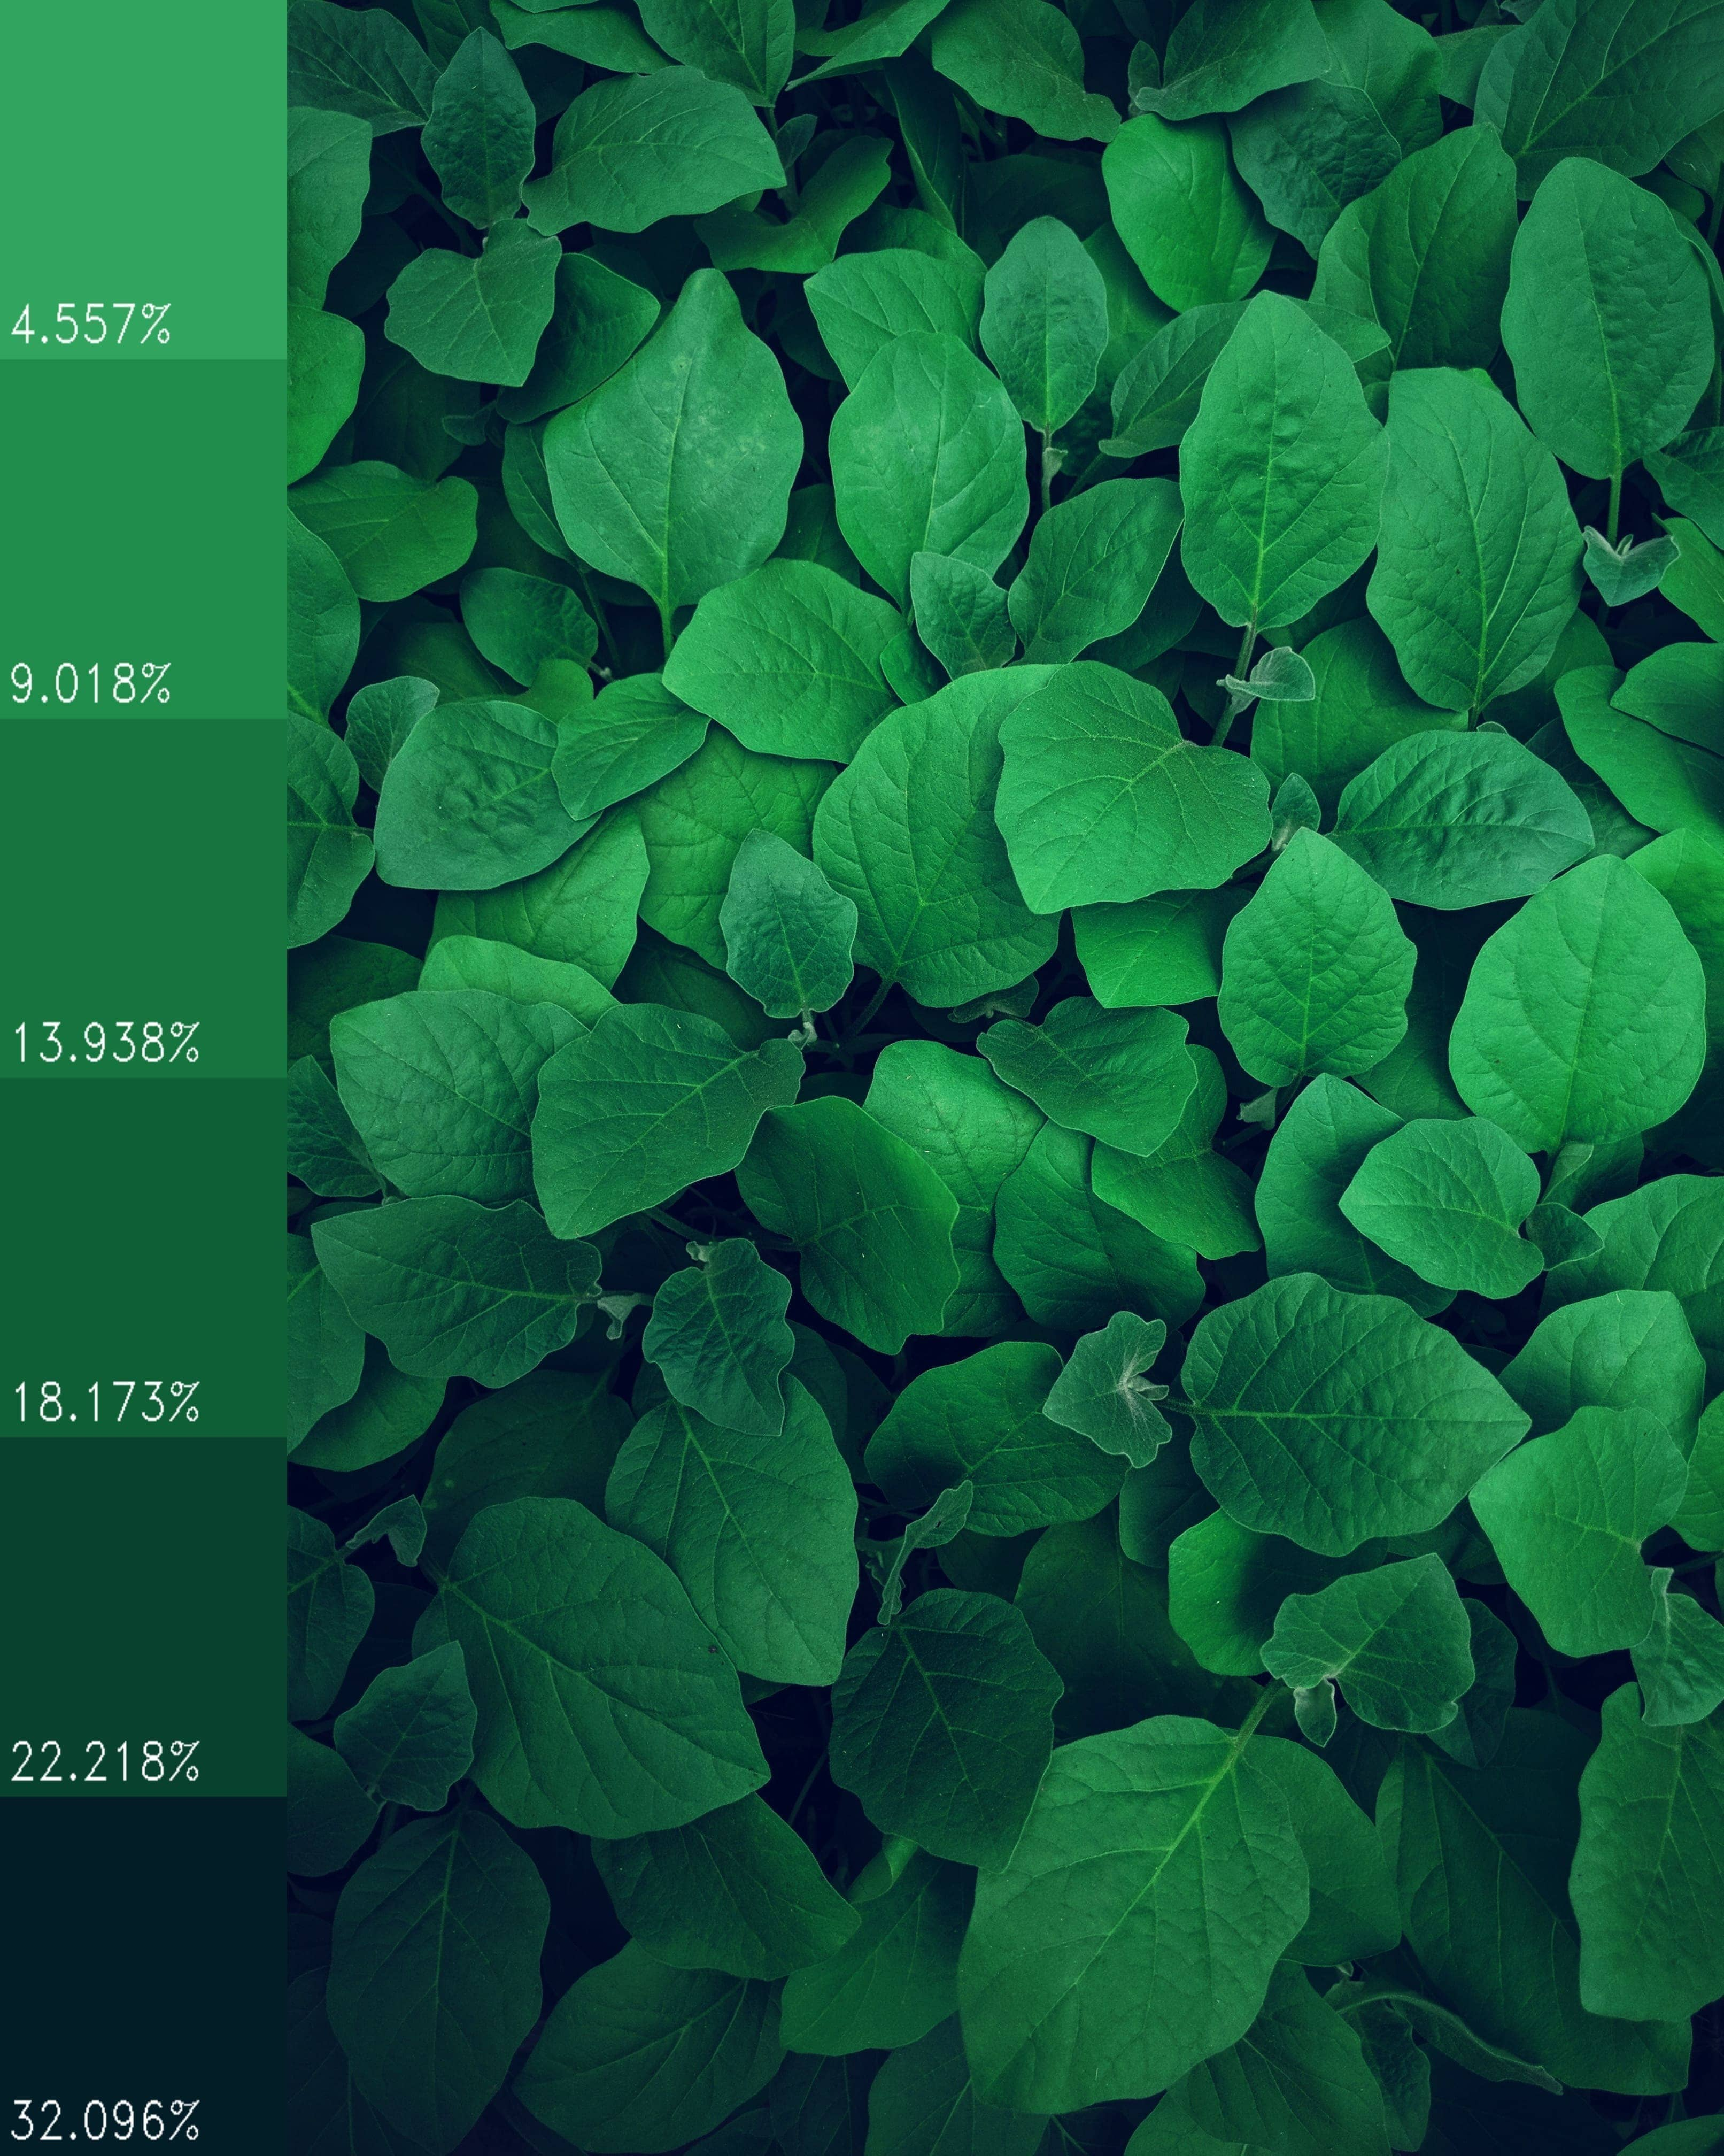

In [19]:
hex_colors= []
for k in range(number_clusters): 
hex_colors.append('#%02X%02X%02X' % (RGB_values[k][0],RGB_values[k][1],RGB_values[k][2]))

#31A45F, #208C4B, #16753F, #08412E, #0E5E36, #031D27